In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import log_loss
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
location="D:\s_chernov\AnacondaProjects\MLSSZ\Data\\"
df_train = pd.read_csv(location+"train.csv",sep=';',na_values="None")
df_test = pd.read_csv(location+"test.csv",sep=';',na_values="None")

In [3]:
del df_train['id']

In [4]:
def make_dummies(source,var_name):
    for i in var_name:
        dummies = pd.get_dummies(source[i])
        source=pd.concat([source,dummies],axis=1)
    return source.drop(var_name,axis=1)    

#df_train.cholesterol=df_train.cholesterol*10
#df_test.cholesterol=df_train.cholesterol*10
#train_lin=make_dummies(df_train,['cholesterol','gluc'])
#test_lin=make_dummies(df_test,['cholesterol','gluc'])


In [5]:
np.random.seed(2707)

train_lin=np.int16(df_train.loc[:,['smoke','alco','cholesterol','gluc','active']].fillna(0))
test_lin=np.int16(df_test.loc[:,['smoke','alco','cholesterol','gluc','active']].fillna(0))
#clf = RandomForestClassifier(n_estimators=500)
#clf.fit(train_lin,df_train.cardio)
#df_train['rf1']=clf.predict_proba(train_lin)[:,1]
#df_test['rf1']=clf.predict_proba(test_lin)[:,1]


In [6]:
df_train['age_year']=np.int16(df_train.age/365)
df_test['age_year']=np.int16(df_test.age/365)


In [7]:
df_train.loc[df_train.weight<20,'weight']=df_train.loc[df_train.weight<20,'weight']*10
df_test.loc[df_test.weight<20,'weight']=df_test.loc[df_test.weight<20,'weight']*10
df_train.loc[df_train.height<100,'height']=df_train.loc[df_train.height<100,'height']*10
df_test.loc[df_test.height<100,'height']=df_test.loc[df_test.height<100,'height']*10

In [8]:
#height and weight errors
correct=df_train.weight>df_train.height
correct_weight=df_train.loc[correct,'weight']
correct_height=df_train.loc[correct,'height']
df_train.loc[correct,'weight']=correct_height
df_train.loc[correct,'height']=correct_weight

correct=df_test.weight>df_test.height
correct_weight=df_test.loc[correct,'weight']
correct_height=df_test.loc[correct,'height']
df_test.loc[correct,'weight']=correct_height
df_test.loc[correct,'height']=correct_weight


In [9]:
df_train.loc[df_train.ap_lo<0,'ap_lo']=-df_train.loc[df_train.ap_lo<0,'ap_lo']
df_test.loc[df_test.ap_lo<0,'ap_lo']=-df_test.loc[df_test.ap_lo<0,'ap_lo']

df_train.loc[df_train.ap_lo>6000,'ap_lo']=df_train.loc[df_train.ap_lo>6000,'ap_lo']/100
df_train.loc[df_train.ap_lo>600,'ap_lo']=df_train.loc[df_train.ap_lo>600,'ap_lo']/10
df_test.loc[df_test.ap_lo>6000,'ap_lo']=df_test.loc[df_test.ap_lo>6000,'ap_lo']/100
df_test.loc[df_test.ap_lo>600,'ap_lo']=df_test.loc[df_test.ap_lo>600,'ap_lo']/10
df_train.loc[df_train.ap_lo<=10,'ap_lo']=df_train.loc[df_train.ap_lo<=10,'ap_lo']*10
df_test.loc[df_test.ap_lo<=10,'ap_lo']=df_test.loc[df_test.ap_lo<=10,'ap_lo']*10



In [10]:
df_train.loc[df_train.ap_hi<0,'ap_hi']=-df_train.loc[df_train.ap_hi<0,'ap_hi']
df_test.loc[df_test.ap_hi<0,'ap_hi']=-df_test.loc[df_test.ap_hi<0,'ap_hi']

df_train.loc[df_train.ap_hi>=10000,'ap_hi']=df_train.loc[df_train.ap_hi>=10000,'ap_hi']/100
df_test.loc[df_test.ap_hi>=10000,'ap_hi']=df_test.loc[df_test.ap_hi>=10000,'ap_hi']/100
df_train.loc[df_train.ap_hi>=300,'ap_hi']=df_train.loc[df_train.ap_hi>=300,'ap_hi']/10
df_test.loc[df_test.ap_hi>=300,'ap_hi']=df_test.loc[df_test.ap_hi>=300,'ap_hi']/10

df_train.loc[df_train.ap_hi<30,'ap_hi']=df_train.loc[df_train.ap_hi<30,'ap_hi']*10
df_test.loc[df_test.ap_hi<30,'ap_hi']=df_test.loc[df_test.ap_hi<30,'ap_hi']*10

In [11]:
correct=df_train.ap_hi<df_train.ap_lo
correct_hi=df_train.loc[correct,'ap_hi']
correct_lo=df_train.loc[correct,'ap_lo']
df_train.loc[correct,'ap_hi']=correct_lo
df_train.loc[correct,'ap_lo']=correct_hi

correct=df_test.ap_hi<df_test.ap_lo
correct_hi=df_test.loc[correct,'ap_hi']
correct_lo=df_test.loc[correct,'ap_lo']
df_test.loc[correct,'ap_hi']=correct_lo
df_test.loc[correct,'ap_lo']=correct_hi

#df_train['ap_div']=df_train.ap_lo/df_train.ap_hi
#df_test['ap_div']=df_test.ap_lo/df_train.ap_hi


In [12]:
df_test.alco=df_test.alco.fillna(0)
df_test.smoke=df_test.smoke.fillna(0)
df_test.active=df_test.active.fillna(1)


#df_train['health']=np.log(df_train.cholesterol*df_train.gluc+df_train.alco*2+df_train.smoke*5+df_train.alco*df_train.smoke*10)
#df_test['health']=np.log(df_test.cholesterol*df_test.gluc+df_test.alco*2+df_test.smoke*5+df_train.alco*df_train.smoke*10)
#df_train['health']=np.log(df_train.cholesterol*df_train.gluc*10+df_train.alco*df_train.smoke*10+df_train.cholesterol*df_train.gluc*df_train.alco*5)
#df_test['health']=np.log(df_train.cholesterol*df_train.gluc*10+df_train.alco*df_train.smoke*10+df_train.cholesterol*df_train.gluc*df_train.alco*5)



In [13]:
features=list(df_train.columns)
features.remove('cardio')
df_train['fat']=df_train.weight/(((df_train.height)/100)**2)
df_test['fat']=df_test.weight/(((df_train.height)/100)**2)
df_train['diff_weight']=50+0.75*(df_train.height-150) + (df_train.age_year-20)/4-df_train.weight
df_test['diff_weight']=50+0.75*(df_test.height-150) + (df_test.age_year-20)/4-df_test.weight
df_train['age_weight']=df_train.age_year/df_train.weight
df_test['age_weight']=df_test.age_year/df_test.weight
df_train.age_year=(df_train.age_year)**2
df_test.age_year=(df_test.age_year)**2

features.remove('age_year')
#features.append('diff_weight')
#features.append('fat')
#features.append('age_weight')

In [16]:
xgb_params={'colsample_bytree': 0.6,
 'eval_metric': 'logloss',
 'gamma': 0.1,
 'learning_rate': 0.02,
 'max_depth': 4,
 'min_child_weight': 8,
 'n_estimators': 900,
 'objective': 'binary:logistic',
 'reg_alpha': 0.01,
 'seed': 123,
 'silent': 1,
 'subsample': 0.9}



In [17]:
def xgb_factory(xgb_params):
    return( xgb.XGBClassifier(
             learning_rate=xgb_params['learning_rate'],
             n_estimators=xgb_params['n_estimators'],
             max_depth=xgb_params['max_depth'],
             min_child_weight=xgb_params['min_child_weight'],
             gamma=xgb_params['gamma'],
             subsample=xgb_params['subsample'],
             colsample_bytree=xgb_params['colsample_bytree'],
             objective=xgb_params['objective'],
             nthread=4,
             scale_pos_weight=1,
             seed=xgb_params['seed']))
hyper=xgb_factory(xgb_params)

In [32]:
kfold = KFold(n_splits=10, random_state=7)
#results = cross_val_score(hyper, df_train.loc[:,features], df_train.cardio, cv=kfold,scoring='neg_log_loss',n_jobs=-1)
results = cross_val_score(hyper, df_train.loc[:,features], df_train.cardio, cv=kfold,scoring='neg_log_loss',n_jobs=-1)

print results.mean(),results.std()
#-0.538616116117 0.00529763687666

-0.538616116117 0.00529763687666


In [19]:
model=hyper.fit(df_train.loc[:,features],df_train.cardio,eval_metric='logloss')
pred=model.predict_proba(df_test.loc[:,features])[:,1]

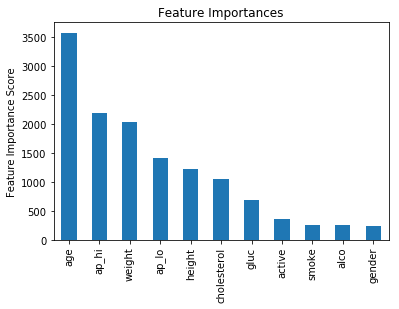

In [20]:
feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [21]:
res=pd.DataFrame({'cardio':pred},columns=['id','cardio'])
res.cardio.to_csv(location+'submission.csv',index=False,header=False)